In this project, I will focus on analyzing customer satisfaction of Korean clothing items on Shopee by examining the sentiment of customer reviews. I will use text mining and sentiment analysis techniques to identify and classify the overall sentiment expressed in each review as positive, negative, or neutral. This will give me a better understanding of the overall customer experience with Korean clothing items purchased on Shopee. I will also identify the most frequently mentioned features and any common issues or concerns, and see how these factors impact customer satisfaction. By understanding the sentiment behind customer reviews, I can gain valuable insights into the quality and popularity of Korean clothing items available on Shopee and help potential buyers make informed decisions. The results of this analysis will provide a comprehensive picture of customer satisfaction with Korean clothing on Shopee and help identify areas for improvement.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
reviews = pd.read_csv("2021June-July_review_data.csv")
reviews.head()

,pk_review,date_collected,cmtid,itemid,shopid,author_username,comment,rating_star,no_tag,pos_good_quality,...,pos_well_packaged,pos_item_shipped_immediately,pos_will_order_again,neg_defective,neg_did_not_receive_item,neg_damaged_packaging,neg_will_not_order_again,neg_rude_seller,neg_item_shipped_late,neg_item_different_from_picture
0,202106134996449880,2021-06-13,4996449880,3550379942,130651949,kaydenshi,it was so good!!!!!!!!! the tela was so nice(´...,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,202106135025745783,2021-06-13,5025745783,3550379942,130651949,a*****0,Ganda ng tela makapal and very comfy🤗😊😊😊😊😊😊😊😊😊...,5,0,0,...,0,1,1,0,0,0,0,0,0,0
2,202106134994515949,2021-06-13,4994515949,3550379942,130651949,s*****a,"Maganda lahat ng napili ko, maganda ang qualit...",5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,202106135006142740,2021-06-13,5006142740,3550379942,130651949,sassynesscruz,Very nice quality. The seller sent a photo bef...,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,202106134927077288,2021-06-13,4927077288,3550379942,130651949,ukaylovers,"Ok ung tela worth it ang binayad, maganda sya ...",5,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df = reviews.loc[:, [col for col in reviews.columns if col not in ['pk_review', 'date_collected', 'no_tag']]]
df = df.drop_duplicates()
df.head()

,cmtid,itemid,shopid,author_username,comment,rating_star,pos_good_quality,pos_excellent_quality,pos_very_accomodating,pos_well_packaged,pos_item_shipped_immediately,pos_will_order_again,neg_defective,neg_did_not_receive_item,neg_damaged_packaging,neg_will_not_order_again,neg_rude_seller,neg_item_shipped_late,neg_item_different_from_picture
0,4996449880,3550379942,130651949,kaydenshi,it was so good!!!!!!!!! the tela was so nice(´...,5,0,1,0,0,0,0,0,0,0,0,0,0,0
1,5025745783,3550379942,130651949,a*****0,Ganda ng tela makapal and very comfy🤗😊😊😊😊😊😊😊😊😊...,5,0,1,0,0,1,1,0,0,0,0,0,0,0
2,4994515949,3550379942,130651949,s*****a,"Maganda lahat ng napili ko, maganda ang qualit...",5,0,1,0,0,0,0,0,0,0,0,0,0,0
3,5006142740,3550379942,130651949,sassynesscruz,Very nice quality. The seller sent a photo bef...,5,0,1,0,0,0,0,0,0,0,0,0,0,0
4,4927077288,3550379942,130651949,ukaylovers,"Ok ung tela worth it ang binayad, maganda sya ...",5,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Missing data
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0:
        print("{} null rate: {}%".format(i, round(null_rate, 2)))

author_username null rate: 0.2%
comment null rate: 36.15%


- 2 columns have missing values, with comment missing over 1/3 of the time

# Dealing with missing data

In [5]:
# Replacments
df['author_username'].replace(np.nan, 'No Data', inplace = True)
df['comment'].replace(np.nan, 'No Data', inplace = True)

df.isnull().sum()

cmtid                              0
itemid                             0
shopid                             0
author_username                    0
comment                            0
rating_star                        0
pos_good_quality                   0
pos_excellent_quality              0
pos_very_accomodating              0
pos_well_packaged                  0
pos_item_shipped_immediately       0
pos_will_order_again               0
neg_defective                      0
neg_did_not_receive_item           0
neg_damaged_packaging              0
neg_will_not_order_again           0
neg_rude_seller                    0
neg_item_shipped_late              0
neg_item_different_from_picture    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33615 entries, 0 to 51278
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   cmtid                            33615 non-null  int64 
 1   itemid                           33615 non-null  int64 
 2   shopid                           33615 non-null  int64 
 3   author_username                  33615 non-null  object
 4   comment                          33615 non-null  object
 5   rating_star                      33615 non-null  int64 
 6   pos_good_quality                 33615 non-null  int64 
 7   pos_excellent_quality            33615 non-null  int64 
 8   pos_very_accomodating            33615 non-null  int64 
 9   pos_well_packaged                33615 non-null  int64 
 10  pos_item_shipped_immediately     33615 non-null  int64 
 11  pos_will_order_again             33615 non-null  int64 
 12  neg_defective                   

# Creating 'sentiment' column

This is an important preprocessing phase, deciding the outcome column (sentiment of review) based on the overall score. If the score is greater than 3, take that as positive and if the value is less than 3 it is negative. If it is equal to 3, take that as neutral sentiment.

In [7]:
#Figuring out the distribution of categories
df['rating_star'].value_counts()

5    29734
4     1705
3     1087
1      656
2      433
Name: rating_star, dtype: int64

In [8]:
def f(row):
    
    '''This function returns sentiment value based on the rating_star from the user'''
    
    if row['rating_star'] == 3.0:
        val = 'Neutral'
    elif row['rating_star'] == 1.0 or row['rating_star'] == 2.0:
        val = 'Negative'
    elif row['rating_star'] == 4.0 or row['rating_star'] == 5.0:
        val = 'Positive'
   
    return val

In [9]:
#Applying the function in our new column
df['sentiment'] = df.apply(f, axis=1)
df.head()

,cmtid,itemid,shopid,author_username,comment,rating_star,pos_good_quality,pos_excellent_quality,pos_very_accomodating,pos_well_packaged,pos_item_shipped_immediately,pos_will_order_again,neg_defective,neg_did_not_receive_item,neg_damaged_packaging,neg_will_not_order_again,neg_rude_seller,neg_item_shipped_late,neg_item_different_from_picture,sentiment
0,4996449880,3550379942,130651949,kaydenshi,it was so good!!!!!!!!! the tela was so nice(´...,5,0,1,0,0,0,0,0,0,0,0,0,0,0,Positive
1,5025745783,3550379942,130651949,a*****0,Ganda ng tela makapal and very comfy🤗😊😊😊😊😊😊😊😊😊...,5,0,1,0,0,1,1,0,0,0,0,0,0,0,Positive
2,4994515949,3550379942,130651949,s*****a,"Maganda lahat ng napili ko, maganda ang qualit...",5,0,1,0,0,0,0,0,0,0,0,0,0,0,Positive
3,5006142740,3550379942,130651949,sassynesscruz,Very nice quality. The seller sent a photo bef...,5,0,1,0,0,0,0,0,0,0,0,0,0,0,Positive
4,4927077288,3550379942,130651949,ukaylovers,"Ok ung tela worth it ang binayad, maganda sya ...",5,0,0,0,0,0,0,0,0,0,0,0,0,0,Positive


In [10]:
df['sentiment'].value_counts()

Positive    31439
Negative     1089
Neutral      1087
Name: sentiment, dtype: int64

# Review Rating Distribution
Let's check out how rating_star is distributed

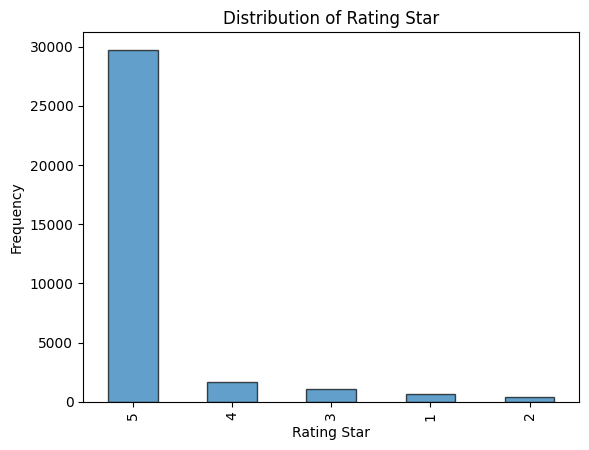

In [11]:
rating_star_counts = df['rating_star'].value_counts()
rating_star_counts.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.xlabel('Rating Star')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Star')
plt.show()

- Have a large number of 5 ratings (nearly 30000) followed by 4,3,1,2.

# Sentiment Distribution

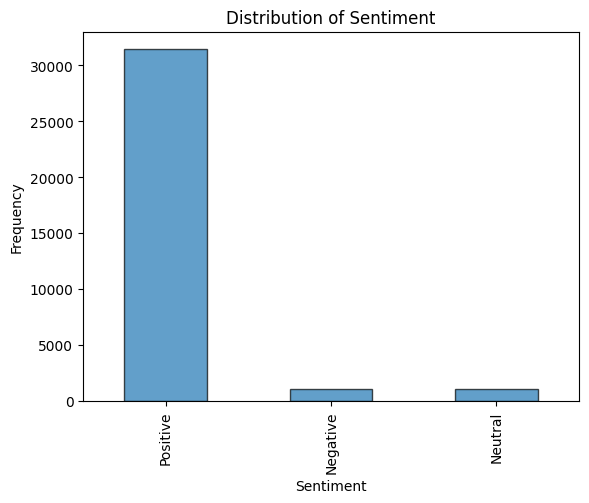

In [12]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment')
plt.show()

- There are a lot of positive reviews (more than 30000), a big difference from negative reviews and neutral reviews.

In [13]:
pos_good_quality = df['pos_good_quality'].sum()
pos_excellent_quality = df['pos_excellent_quality'].sum()
pos_very_accomodating = df['pos_very_accomodating'].sum()
pos_well_packaged = df['pos_well_packaged'].sum()
pos_item_shipped_immediately = df['pos_item_shipped_immediately'].sum()
pos_will_order_again = df['pos_will_order_again'].sum()
print(pos_good_quality, pos_excellent_quality, pos_very_accomodating, pos_well_packaged, pos_item_shipped_immediately, pos_will_order_again)

0 10791 6792 0 7087 7184


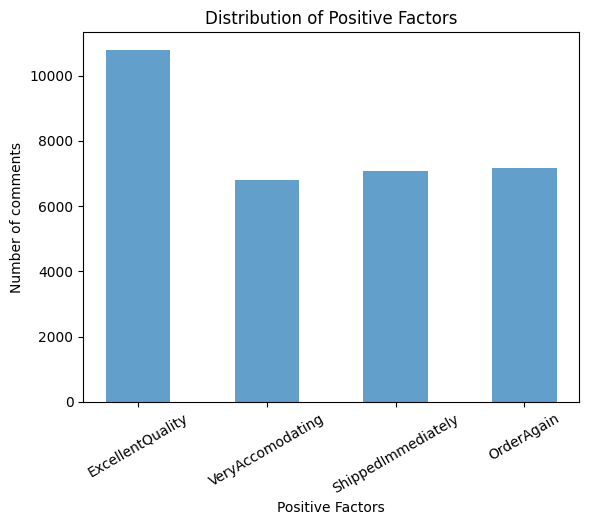

In [14]:
labels = ['ExcellentQuality', 'VeryAccomodating', 'ShippedImmediately', 'OrderAgain']
sizes = [pos_excellent_quality, pos_very_accomodating, pos_item_shipped_immediately, pos_will_order_again]

x = [i for i, _ in enumerate(labels)]

fig, ax = plt.subplots()
ax.bar(x, sizes, width = 0.5, alpha = 0.7)

ax.set_xlabel('Positive Factors')
ax.set_ylabel("Number of comments")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.set_title('Distribution of Positive Factors')
plt.show()

In [15]:
neg_defective = df['neg_defective'].sum()
neg_did_not_receive_item = df['neg_did_not_receive_item'].sum()
neg_damaged_packaging = df['neg_damaged_packaging'].sum()
neg_will_not_order_again = df['neg_will_not_order_again'].sum()
neg_rude_seller = df['neg_rude_seller'].sum()
neg_item_shipped_late = df['neg_item_shipped_late'].sum()
neg_item_different_from_picture = df['neg_item_different_from_picture'].sum()
print(neg_defective, neg_did_not_receive_item, neg_damaged_packaging, neg_will_not_order_again, neg_rude_seller, neg_item_shipped_late, neg_item_different_from_picture)

0 0 0 0 28 137 0


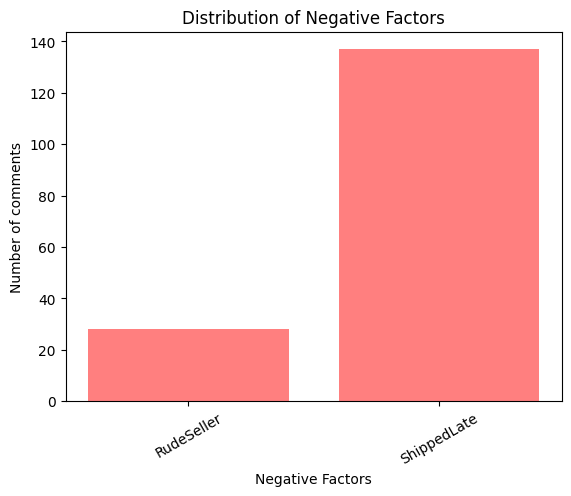

In [16]:
labels1 = ['RudeSeller', 'ShippedLate']
sizes1 = [neg_rude_seller, neg_item_shipped_late]

x1 = [i for i, _ in enumerate(labels1)]

fig, ax = plt.subplots()
ax.bar(x1, sizes1, color = 'r', alpha = 0.5)

ax.set_xlabel('Negative Factors')
ax.set_ylabel("Number of comments")
ax.set_xticks(x1)
ax.set_xticklabels(labels1, rotation=30)
ax.set_title('Distribution of Negative Factors')
plt.show()

The number of negative comments is very small compared to the number of positive comments, proving that Korean trending clothing stores on Shopee in the Philippines have sold quality products and provided quality services such as fast delivery to meet customers' needs.

# Remove special characters in "comment" column

In [17]:
import re
df['comment'] = df['comment'].apply(lambda x: re.sub(r'[\(\)]', '', x))

df['comment'] = df['comment'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

df['comment'] = df['comment'].apply(remove_special_characters)
df.head()

,cmtid,itemid,shopid,author_username,comment,rating_star,pos_good_quality,pos_excellent_quality,pos_very_accomodating,pos_well_packaged,pos_item_shipped_immediately,pos_will_order_again,neg_defective,neg_did_not_receive_item,neg_damaged_packaging,neg_will_not_order_again,neg_rude_seller,neg_item_shipped_late,neg_item_different_from_picture,sentiment
0,4996449880,3550379942,130651949,kaydenshi,it was so good the tela was so nice,5,0,1,0,0,0,0,0,0,0,0,0,0,0,Positive
1,5025745783,3550379942,130651949,a*****0,Ganda ng tela makapal and very comfy Order uli...,5,0,1,0,0,1,1,0,0,0,0,0,0,0,Positive
2,4994515949,3550379942,130651949,s*****a,Maganda lahat ng napili ko maganda ang quality...,5,0,1,0,0,0,0,0,0,0,0,0,0,0,Positive
3,5006142740,3550379942,130651949,sassynesscruz,Very nice quality The seller sent a photo befo...,5,0,1,0,0,0,0,0,0,0,0,0,0,0,Positive
4,4927077288,3550379942,130651949,ukaylovers,Ok ung tela worth it ang binayad maganda sya o...,5,0,0,0,0,0,0,0,0,0,0,0,0,0,Positive


# Creating few more features for text analysis
Now, let's create comment length and word count

Comment length: length of the comment which includes each letters and spaces

Word length: This measures how many words are there in comment

In [18]:
df['comment_len'] = df['comment'].astype(str).apply(len)
df['word_count'] = df['comment'].apply(lambda x: len(str(x).split()))

# Review Text Length Distribution
Let's check out the length of review text

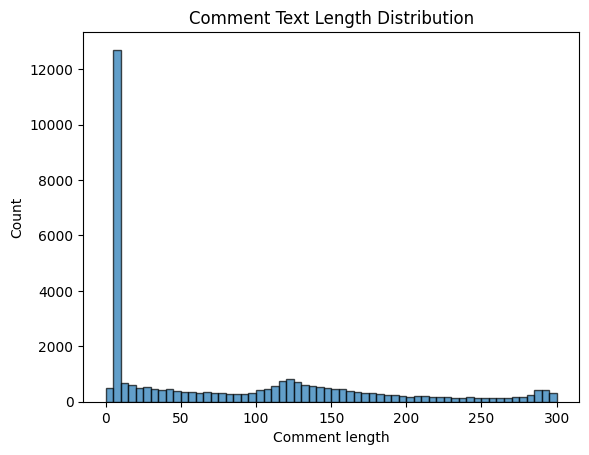

In [19]:
df['comment_len'].plot(kind='hist', bins = 60, edgecolor='black', alpha=0.7)
plt.xlabel('Comment length')
plt.ylabel('Count')
plt.title('Comment Text Length Distribution')
plt.show()

- Comment length from 5 to 10 accounts for the majority of comments

# Review Text Word Count Distribution
Let's check out the word count of comment text

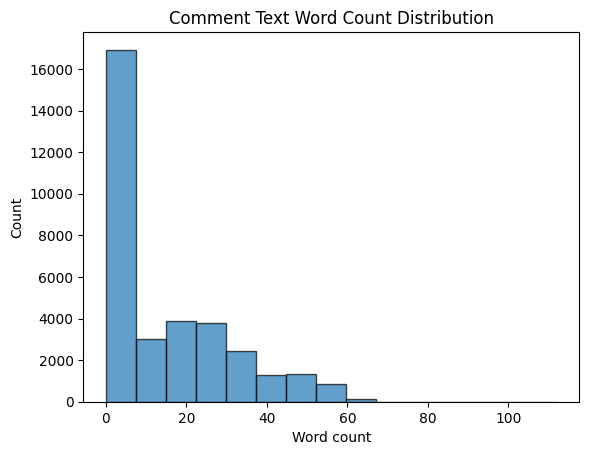

In [20]:
df['word_count'].plot(kind='hist', bins = 15, edgecolor='black', alpha=0.7)
plt.xlabel('Word count')
plt.ylabel('Count')
plt.title('Comment Text Word Count Distribution')
plt.show()

- Comments with less than 10 words make up the majority of comments